In [1]:
cd ../..

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D


In [2]:
from Magnetisation.Propagator import Propagator
from Magnetisation.Generator import generator_CNN
from Magnetisation.Train import Magnetisation_CNN_training
from Magnetisation.utils import LoadData

import numpy as np
import json
import torch
import matplotlib.pyplot as plt

[[ 3.94336766e-06 -6.07115250e-06  1.22681104e-05 ... -5.88175851e-06
   1.44587400e-05 -6.67861589e-06]
 [-1.16785474e-05  5.93845674e-06 -3.46556504e-06 ... -2.26819256e-05
   2.89130931e-05  2.63516225e-05]
 [-1.05259909e-05 -2.48646712e-05  3.56762230e-06 ... -1.00370835e-05
  -1.28770884e-05  1.12021631e-05]
 ...
 [-3.54951342e-05 -1.23828046e-05  3.37599918e-05 ... -3.05581326e-05
  -5.11515139e-05  2.47953028e-05]
 [-4.25775527e-05  1.34110128e-05  1.14523178e-05 ... -1.82521578e-05
   2.56685707e-05 -6.11408293e-06]
 [-4.81065840e-05 -3.26336713e-05 -1.07344163e-04 ... -5.52006571e-05
   2.26014354e-05 -1.30605252e-05]]
[[ 3.94336766e-06 -6.07115250e-06  1.22681104e-05 ... -5.88175851e-06
   1.44587400e-05 -6.67861589e-06]
 [-1.16785474e-05  5.93845674e-06 -3.46556504e-06 ... -2.26819256e-05
   2.89130931e-05  2.63516225e-05]
 [-1.05259909e-05 -2.48646712e-05  3.56762230e-06 ... -1.00370835e-05
  -1.28770884e-05  1.12021631e-05]
 ...
 [-3.54951342e-05 -1.23828046e-05  3.3759991

{'PixelSize': 4.8e-07,
 'ImageShape': 256,
 'NV': {'Height': 3e-07,
  'Theta': 0,
  'FindTheta': False,
  'Phi': 0,
  'FindPhi': False},
 'Magnetisation': {'Phi': -45,
  'FindPhi': False,
  'Theta': 90,
  'FindTheta': False},
 'FFT': {'PaddingFactor': 2,
  'performPadding': False,
  'PaddingMode': 'constant',
  'Extended': False,
  'Extention': 100,
  'Filter': {'useHanning': False,
   'useHighCutoff': False,
   'useLowCutoff': False,
   'LambdaHighCutoff': 1e-07,
   'LambdaLowCutoff': 7e-06}}}

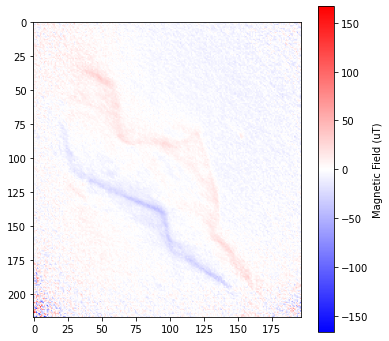

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load data
dataPath='data/Magnetisation in plane/CuCrP2S6_unimelb_measurement_70_Bnv.json'
PROP = LoadData(dataPath, ImageShape = 256, Normalise=True, Display=True)

# Update some of the options
PROP.options['Magnetisation']['Theta']= 90
PROP.options['Magnetisation']['FindTheta']= False
PROP.options['Magnetisation']['Phi'] = -45
PROP.options['Magnetisation']['FindPhi']= False
display(PROP.options)

In [4]:
# Make the neural network
Generator = generator_CNN(Size=1, ImageSize=PROP.options['ImageShape']).to(device)

In [5]:
# Set the machine learning paramaters for keyword unpacking
ML_options = dict()
ML_options['mlp']=False
ML_options['LossFunction']='L1'
ML_options['Magnetization']=None
ML_options['IntegerOnly']=False
ML_options['PositiveMagnetisationOnly']=True
ML_options['PrintLossValue']=False
ML_options['Epochs']= 150

  0%|          | 0/150 [00:00<?, ?it/s]C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:356: RuntimeWarning: invalid value encountered in true_divide
  [-(kx ** 2) / k, -(kx * ky) / k, -1j * kx],
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:357: RuntimeWarning: invalid value encountered in true_divide
  [-kx * ky / k, -(ky ** 2 / k), -1j * ky],
C:\Users\parax\anaconda3\envs\py_new\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(
100%|██████████| 150/150 [00:33<00:00,  4.50it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists who

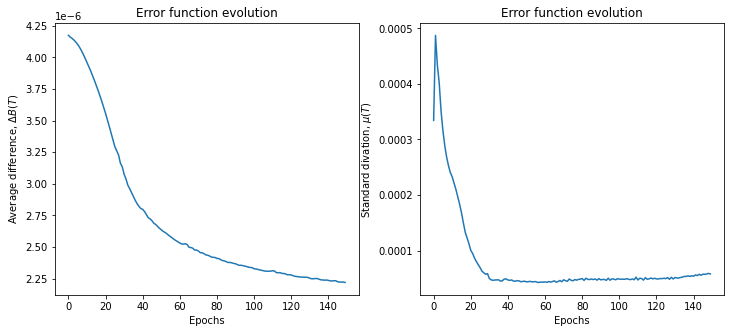

In [6]:
# Train the network
CNN_training = Magnetisation_CNN_training(device, Generator, PROP,ML_options)
bnv_cnn = CNN_training.train_cnn(**ML_options)

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Train.py:274: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Original B"] = np.rot90(self.PROP.MagneticFieldExtended[self.PROP.OriginalROI] * unit_conversion_M_to_B, k=1)
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Train.py:275: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Reconstructed B"] = np.rot90(ReconstructedBnv[self.PROP.OriginalROI] * unit_conversion_M_to_B , k=1)
C:\Users\parax\Drop

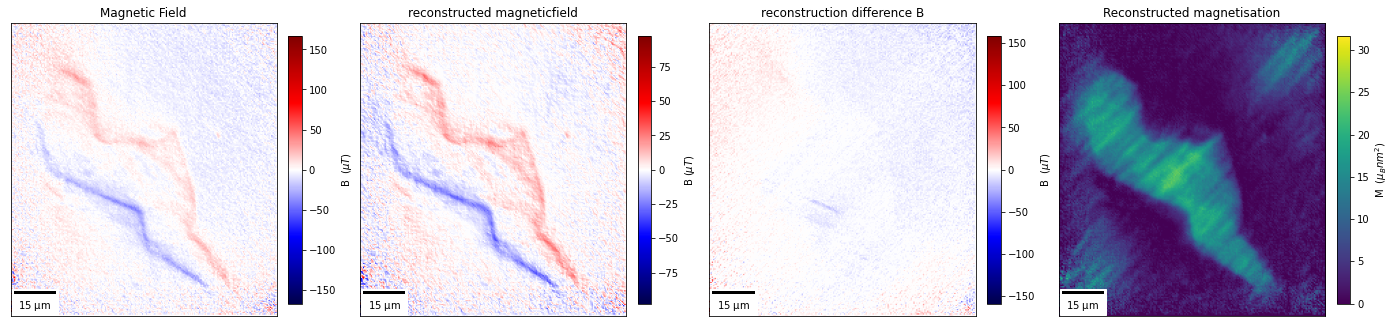

In [7]:
# Get the results and plot
Results = CNN_training.extract_results(plotResults = True)

In [8]:
from Magnetisation.utils import SaveDictToJson
# SaveDictToJson("B_Reconstruction_dataset_70_mlp", Results)

serialize NumPy array into JSON and write into a file
Done writing serialized NumPy array into file
